In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/Titanic_dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df.shape

(418, 12)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
df['Age'].replace(np.nan, df['Age'].mean(), inplace=True)
df['Age'].isnull().sum()

0

In [11]:
df['Fare'].replace(np.nan, df['Fare'].mean(), inplace=True)
df['Fare'].isnull().sum()

0

In [12]:
df.drop('Cabin', axis=1,inplace=True)

In [13]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
df.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             80
SibSp            7
Parch            8
Ticket         363
Fare           170
Embarked         3
dtype: int64

In [15]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


In [16]:
df.groupby('Sex')[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,1.0,2.144737,30.272400,0.565789,0.598684,49.747699
male,0.0,2.334586,30.272699,0.379699,0.274436,27.558326


In [17]:
df.groupby('Embarked')[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch','Fare']].mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,
C,0.392157,1.794118,33.862273,0.421569,0.382353,66.259765
Q,0.521739,2.869565,29.816134,0.195652,0.021739,10.957700
S,0.325926,2.340741,28.994255,0.500000,0.459259,28.257832


In [18]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

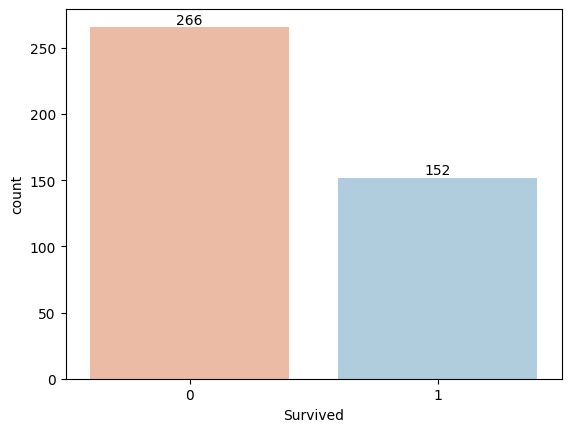

In [19]:
ax = sns.countplot(x=df['Survived'], palette='RdBu')
ax.bar_label(ax.containers[0])
plt.show()

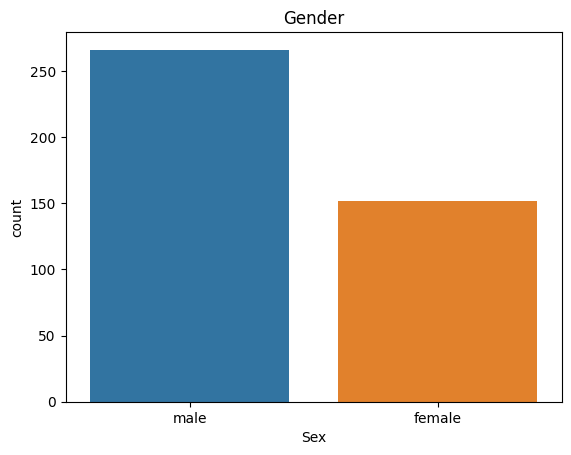

In [20]:
sns.countplot(x = 'Sex', data = df).set_title('Gender')
plt.show()

Text(0.5, 1.0, 'Number of Passengers in different class of both Male and Female')

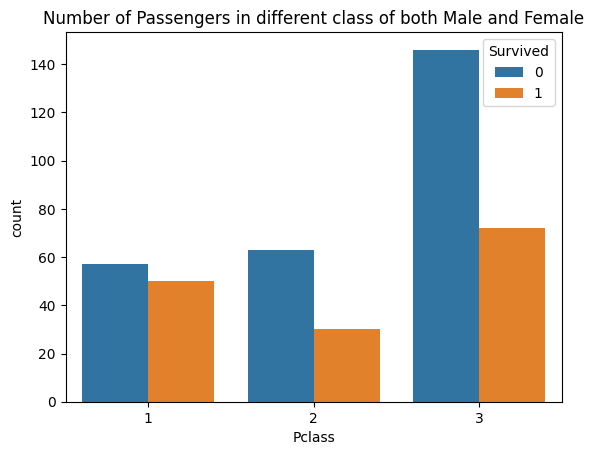

In [21]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = df).set_title('Number of Passengers in different class of both Male and Female')

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [23]:
df_update = df.drop(['PassengerId','Name', 'Ticket'], axis=1)
df_update.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [24]:
df_update['Sex'].replace({'male':1, 'female':0}, inplace=True)
# Replace 'Q' with 0, 'S' with 1, and 'C' with 2 in the 'Embarked' column

df_update['Embarked'].replace({'Q':0, 'S':1, 'C':2}, inplace=True)
df_update.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,0
1,1,3,0,47.0,1,0,7.0000,1
2,0,2,1,62.0,0,0,9.6875,0
3,0,3,1,27.0,0,0,8.6625,1
4,1,3,0,22.0,1,1,12.2875,1


In [25]:
X = df_update.drop('Survived', axis=1)
y = df_update['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,0
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,0
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


In [29]:
LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [30]:
y_pred_train = LR.predict(X_train)

In [31]:
print('Accuracy: ', accuracy_score(y_train, y_pred_train))
print('Precision: ', precision_score(y_train, y_pred_train))
print('Recall: ', recall_score(y_train, y_pred_train))
print('F1 Score: ', f1_score(y_train, y_pred_train))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


In [32]:
y_pred_LR = LR.predict(X_test)

In [33]:
print('Accuracy: ', accuracy_score(y_test, y_pred_LR))
print('Precision: ', precision_score(y_test, y_pred_LR))
print('Recall: ', recall_score(y_test, y_pred_LR))
print('F1 Score: ', f1_score(y_test, y_pred_LR))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


In [34]:
lr_report = classification_report(y_test, y_pred_LR)
lr_scores = cross_val_score(LR, X_train_scaled, y_train, cv=5, scoring='accuracy')
print('The classification report of Logistic Regression is below : ', '\n\n\n', lr_report)
print(f"Logistic Regression Mean Cross-Validation Score: {lr_scores}")

The classification report of Logistic Regression is below :  


               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Logistic Regression Mean Cross-Validation Score: [1. 1. 1. 1. 1.]


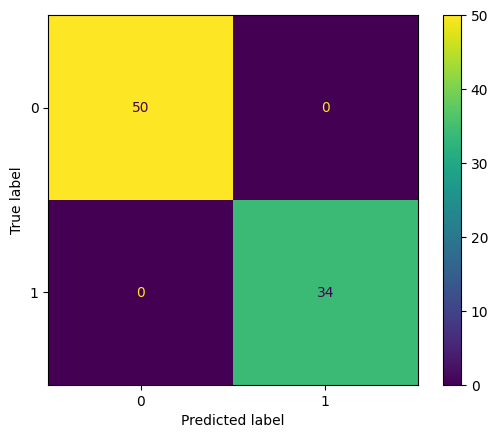

In [35]:
cm = confusion_matrix(y_test, y_pred_LR, labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot();

In [36]:
round(df['Survived'].value_counts(normalize=True)*100, 2)

0    63.64
1    36.36
Name: Survived, dtype: float64

Conclusion:

1)Titanic dataset, 36.36% of passengers survived, while 63.64% did not survive.

2)Those embarking from Queenstown had a higher likelihood of survival, while those embarking from Southampton had lower chances.
3)Logistic Regression model achieved 100% accuracy.

4)Data preprocessing involves handling missing values, transforming categorical variables, and splitting the dataset into training and testing sets.

5)Missing values in 'Age', 'Embarked', and 'Fare' are filled with appropriate values.